<a href="https://colab.research.google.com/github/bimal-bp/Twitter_Sentiment_analysis.ipynb/blob/ML_MODELS/Twitter_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Twitter_Data.csv')
df.head(4)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0


In [119]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [120]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [122]:
df['category'].unique()

array([-1.,  0.,  1., nan])

In [123]:
round(df.describe(),3)

,category
count,162973.000
mean,0.225
std,0.781
min,-1.000
25%,0.000
50%,0.000
75%,1.000
max,1.000


In [124]:
df[df['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [125]:
df[df['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [126]:
df.dropna(inplace=True)

In [127]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [128]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [129]:
from nltk.stem import WordNetLemmatizer
import re
def preprocess(textdata):
  preprocesstext=[]
  wordlemm=WordNetLemmatizer()

  urlpattern=r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
  userpattern='@[^\s]+'
  alphapattern="[^a-zA-Z0-9]"
  sequencepattern=r"(.)\1\1+"
  sequencereplacepattern=r"\1\1"

  for tweet in textdata:
    tweet=tweet.lower()

    tweet=re.sub(urlpattern,'URL',tweet)

    for emoji in emoji.keys():
      tweet=tweet.replace(emoji,"EMOJI"+emojis[emoji])
    tweet=re.sub(userpattern,'USER',tweet)
    tweet=re.sub(alphapattern," ",tweet)
    tweet=re.sub(sequencepattern,sequencereplacepattern,tweet)

    tweetwords=''
    for word in tweet.split():

      if len(word)>1:
        word=wordlemm.lemmatize(word)
        tweetwords += (word+'')
    preprocesstext.append(tweetwords)

  return preprocesstext

In [130]:
def massage_text_process(mess):
  no_punctuation=[char for char in mess if char not in string.no_punctuation]
  no_punctuation=''.join(no_punctuation)

  return [word for word in no_punctuation.split() if word.lower()
          not in stopwords.words('english')]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


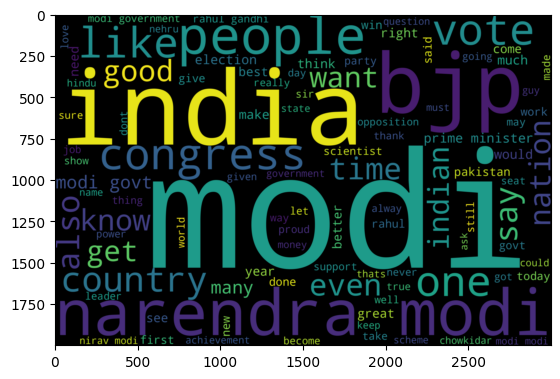

In [131]:
#posetive tweets

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=''
for tweet in df[df['category']==1.0]['clean_text']:
  text += f"{tweet}"
nltk.download('stopwords')
from nltk.corpus import stopwords
wordcloud=WordCloud(
width=3000, height=2000,max_words=100,background_color='black',
stopwords=set(nltk.corpus.stopwords.words('english'))).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

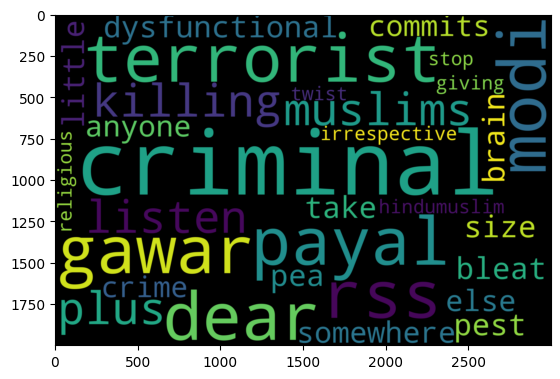

In [132]:
# negative tweets
text=''
for tweet in df[df['category']== -1.0]['clean_text']:
  text=f"{tweet}"
wordcloud=WordCloud(
width=3000,height =2000,max_words=100,background_color='black',
stopwords=set(nltk.corpus.stopwords.words("english"))).generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.show()




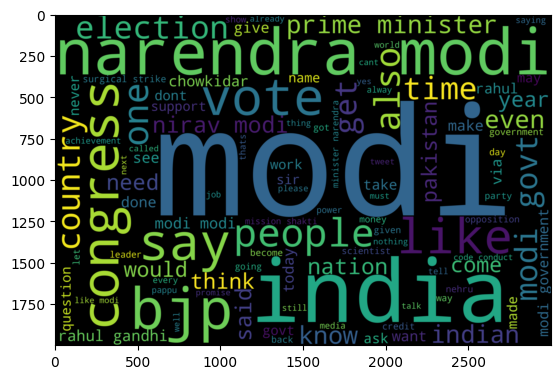

In [133]:
# for neutral tweets
text=''
for tweet in df[df['category']==0.0]['clean_text']:
  text +=f"{tweet}"
wordcloud=WordCloud(
width=3000,height=2000,background_color='black',max_words=100,
stopwords=set(nltk.corpus.stopwords.words("english"))).generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [134]:
##count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
vec = CountVectorizer(max_features=10000)
vec.fit(df['clean_text'])

trn, val = train_test_split(df, test_size=0.3, random_state=42)

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.948947659078358

In [135]:
print(clf.score(val_abs,val['category']))

0.948947659078358


In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(val['category'],val_preds)

0.948947659078358

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val['category'],val_preds)

array([[ 9572,   264,   855],
       [  198, 16215,   231],
       [  687,   261, 20608]])

In [138]:
from sklearn.metrics import classification_report
print(classification_report(val['category'],val_preds))

              precision    recall  f1-score   support

        -1.0       0.92      0.90      0.91     10691
         0.0       0.97      0.97      0.97     16644
         1.0       0.95      0.96      0.95     21556

    accuracy                           0.95     48891
   macro avg       0.94      0.94      0.94     48891
weighted avg       0.95      0.95      0.95     48891



In [139]:

##tf-idf vectorizer
vec = TfidfVectorizer(max_features=10000)
_ = vec.fit(list(df['clean_text']))

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
_ = clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.9446523900104313

In [140]:
print(clf.score(val_abs,val['category']))

0.9446523900104313


In [141]:
import re
import contractions  # Corrected import statement
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#preprocess text function
def preprocess_text(text_data):
  preprocessed_text=[]
  for sentence in tqdm(text_data):
    sentence=contractions.fix(sentence)
    if type(sentence)== type(''):
      example1=BeautifulSoup(sentence)
      sentence=example1.get_text()
    sentence = sentence.replace('\\r',' ')
    sentence=sentence.replace('\\n',' ')
    sentence=sentence.replace('\\"',' ')
    sentence=re.sub('[A-Za-z0-9]+',' ',sentence)
    sentence=' '.join( e for e in sentence.split() if e.lower() not in STOP_WORDS)
    sentence=re.sub("[\d-]",'',sentence)
    porter=PorterStemmer()
    sentence=' '.join(porter.stem(e) for e in sentence.split())
    preprocessed_text.append(sentence.lower().strip())
  return preprocessed_text

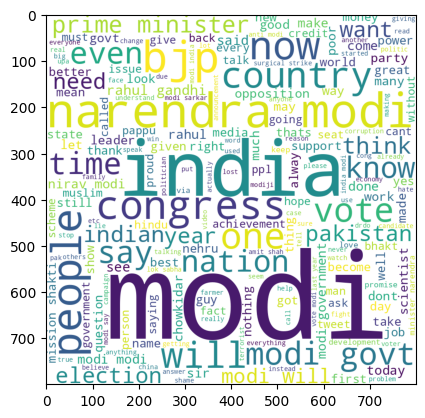

In [142]:
from wordcloud import WordCloud,STOPWORDS
comment_words=''
stopwords=set(STOPWORDS)

for val in df['clean_text'].values:
  val=str(val)
  tokens=val.split()

  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stopwords).generate(comment_words)
plt.imshow(wordcloud)
plt.show()

In [143]:
# tokenize
import nltk
from keras.preprocessing.text import Tokenizer

tok = Tokenizer(num_words=1000000)

# fit
tok.fit_on_texts(df['clean_text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [152]:

X_trn = tokenizer.texts_to_sequences(trn['clean_text'])
X_val = tokenizer.texts_to_sequences(df['clean_text'])

In [159]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen=200
X_trn=pad_sequences(X_trn,maxlen=maxlen)
X_val=pad_sequences(X_val,maxlen=maxlen)

In [161]:
embedding_dim = 50  # Corrected variable name from 'embedding' to 'embedding_dim'
vocab_size = len(tok.word_index) + 1  # Corrected variable name from 'vocab_size' to 'vocab_size'

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))  # You should define 'maxlen' somewhere

# Flatten the output of the Embedding layer
model.add(Flatten())  # Corrected from 'flatten()' to 'Flatten()'

# Add a Dense (fully connected) layer with 200 units and ReLU activation
model.add(Dense(200, activation='relu', name='Fully_Connected'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid', name='Output'))

# Compile the model with specified optimizer, loss function, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),  # Corrected 'optimizer' to 'optimizers'
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 50)           5683950   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 Fully_Connected (Dense)     (None, 200)               2000200   
                                                                 
 Output (Dense)              (None, 1)                 201       
                                                                 
Total params: 7684351 (29.31 MB)
Trainable params: 7684351 (29.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: xlabel='category', ylabel='Density'>

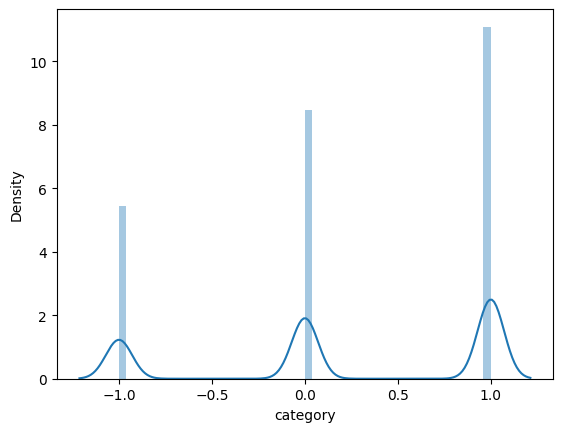

In [168]:
import seaborn as sns
sns.distplot(df['category'])

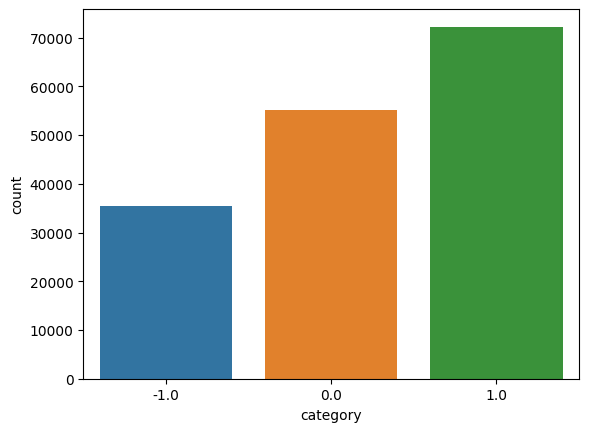

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that "category" is a categorical variable in your DataFrame (df)
sns.countplot(data=df, x="category")
plt.show()


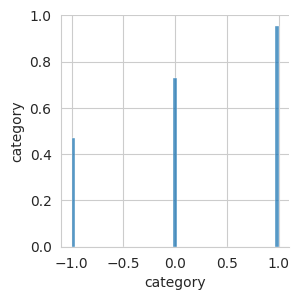

In [173]:
sns.set_style("whitegrid")
sns.pairplot(df[['clean_text','category']], size=3)
plt.show()

<Axes: >

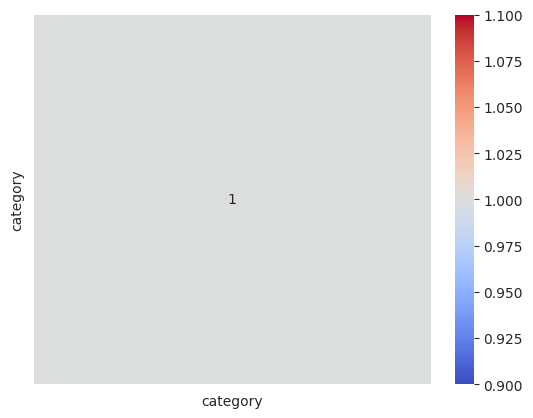

In [174]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')